*Función convexa: Que en cualquier corte de mi función, al unir dos puntos cualquiera, la línea no choque con sus bordes.*

# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="300px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

Interpolación: Búsqueda de datos entre los que ya tengo
Extrapolación: Búsqueda de datos por fuera de los que ya tengo

## Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="200px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

In [2]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#opt.minimize?
#fun: criterio de optimización
#x0: condiciones iniciales para los parámetros de búsqueda
#args: argumentos extra (además de 'x') que necesita 'fun'

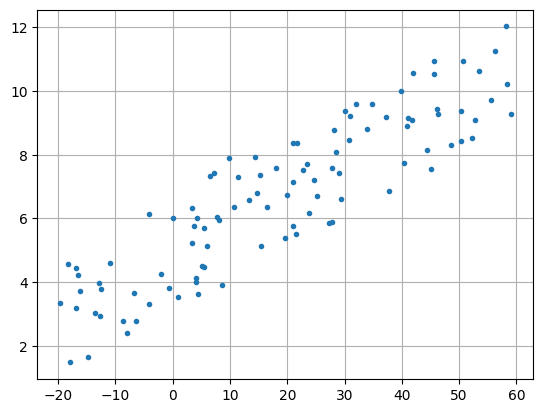

In [ ]:
np.random.seed(10)
x=np.random.uniform(-20,60,100) #100 números aleatorios entre -20 y 60 con distribución uniforme
#con distribución uniforme significa que la probabilidad de encontrar un valor es la misma en cada intervalo
x.sort() #ordenarlos en ascendente
y=5+0.1*x+np.random.uniform(-2,2,100) #le doy una tendencia a los valores de 'y' (que idealmente no conozco)
                                      #dispersándolos +-2 alrededor de una línea recta y=5+0.1x
plt.plot(x,y,'o',ms=3)
plt.grid()

In [ ]:
# Error cuadrático acululado (criterio de optimización)

def error(beta,x,y):
  f=beta[0]+beta[1]*x #función que estoy buscando
  return np.sum((y-f)**2)

In [ ]:
beta_inicial=np.random.rand(2) #np.array([0,0])

In [ ]:
sol_1=opt.minimize(error,beta_inicial,args=(x,y))
sol_1

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 119.87545900848292
        x: [ 4.858e+00  9.880e-02]
      nit: 5
      jac: [-1.907e-06 -1.907e-06]
 hess_inv: [[ 8.663e-03 -1.945e-04]
            [-1.945e-04  1.033e-05]]
     nfev: 24
     njev: 8

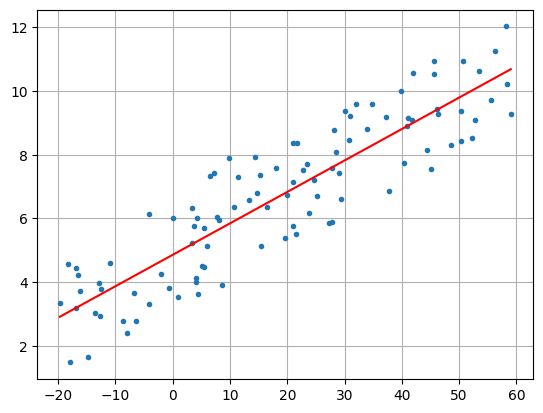

In [ ]:
plt.plot(x,y,'o',ms=3)
f=sol_1.x[0]+sol_1.x[1]*x #Función encontrada
plt.plot(x,f,'r')
plt.grid()

La función óptima encontrada es $\hat{f}=4.86+0.0988x$ con un error cuadrático acumulado de $119.88$
___

## Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

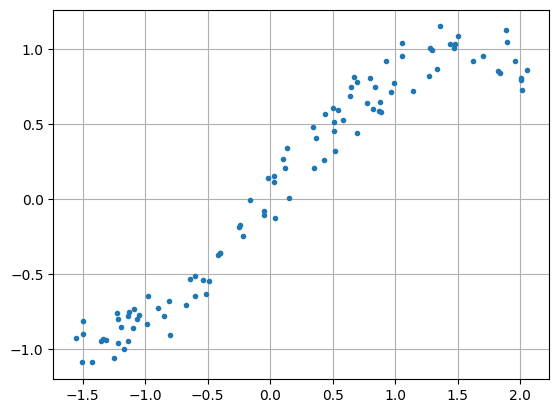

In [ ]:
np.random.seed(0)
x=np.random.uniform(-np.pi/2,np.pi*2/3,100)
x.sort()
y=np.sin(x)+np.random.uniform(-0.2,0.2,100)
plt.plot(x,y,'o',ms=3)
plt.grid()

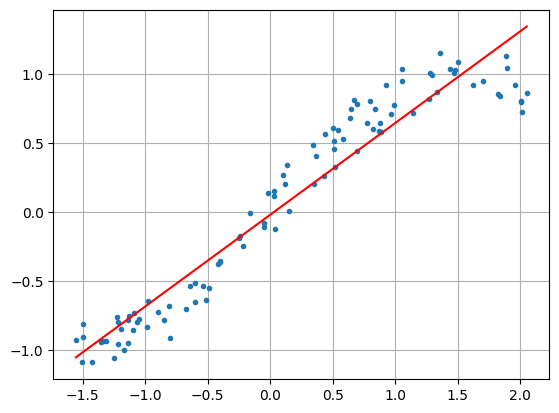

In [ ]:
#Polinomio lineal

sol_1=opt.minimize(error,beta_inicial,args=(x,y)) #solo actualizamos los puntos 'x' y 'y'
plt.plot(x,y,'o',ms=3)
f=sol_1.x[0]+sol_1.x[1]*x #función encontrada
plt.plot(x,f,'r')
plt.grid()

In [ ]:
sol_1.x #parámetros óptimos

array([-0.01982936,  0.66489072])

In [ ]:
sol_1.fun #error cuadrático acumulado

np.float64(4.136829215733008)

La mejor función lineal encontrada es $\hat{f}=0.6649x-0.0198$, con un error cuadrático acumulado de $4.168$

In [ ]:
#Polinomio Cuadrático

def error2(beta,x,y):
  f=beta[0]+beta[1]*x+beta[2]*x**2 #Ahora la función buscada es cuadrática
  return np.sum((y-f)**2)

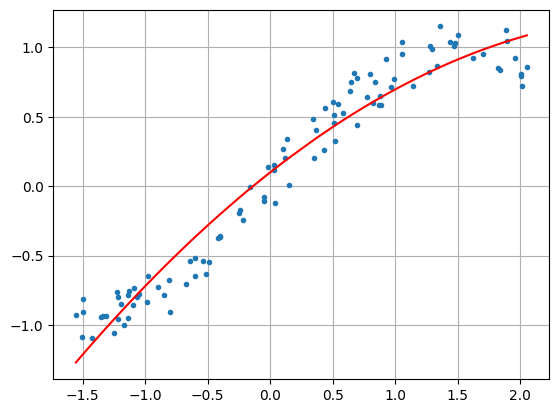

In [ ]:
beta_inicial=np.random.rand(3)
sol_2=opt.minimize(error2,beta_inicial,args=(x,y)) #Actualizo 'x' y 'y'
plt.plot(x,y,'o',ms=3)
f=sol_2.x[0]+sol_2.x[1]*x+sol_2.x[2]*x**2 #Función encontrada
plt.plot(x,f,'r')
plt.grid()

$$ \hat{f}=\beta_0+\beta_1x+\beta_2x^2+\dots+\beta_nx^n$$
$$ \hat{f}= \beta \cdot [x^0 \;\ x^1 \;\ x^2 \dots \; x^n]^T $$

In [7]:
from re import X
def fhat(beta,x):
  X=np.array([x**i for i in range(len(beta))]).T
  return X@beta # el @ es una multiplicación matricial

In [8]:
def error3(beta,x,y):
  return np.sum((y-fhat(beta,x))**2)


In [9]:
beta_inicial=np.random.rand(2)
sol_1=opt.minimize(error3,beta_inicial,args=(x,y))

beta_inicial=np.random.rand(3)
sol_2=opt.minimize(error3,beta_inicial,args=(x,y))

beta_inicial=np.random.rand(4)
sol_3=opt.minimize(error3,beta_inicial,args=(x,y))

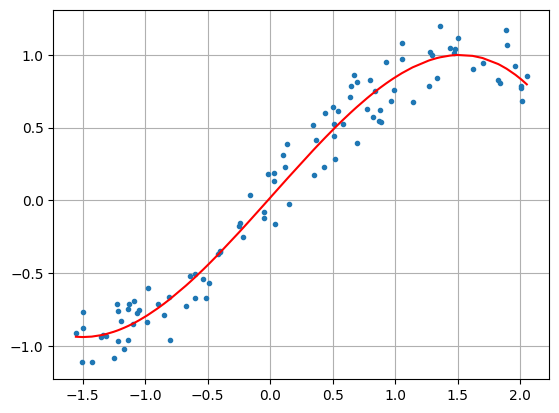

In [10]:
plt.plot(x,y,'o',ms=3)
f=fhat(sol_3.x,x)
plt.plot(x,f,'r')
plt.grid()

In [11]:
def error3(beta,x,y):
  return np.sum((y-fhat(beta,x))**2)

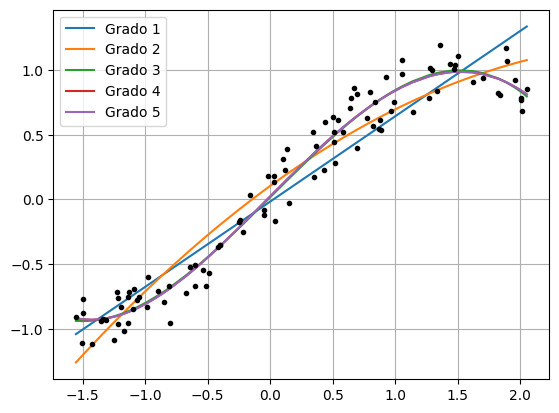

In [12]:
#entrenamos y graficamos 'n' polinomios en un for
n=5
sol=[]
for i in range(1,n+1):
  beta_inicial=np.random.rand(i+1)
  sol.append(opt.minimize(error3,beta_inicial,args=(x,y)))
  f=fhat(sol[-1].x,x)
  plt.plot(x,f, label='Grado '+str(i))
plt.legend()
plt.plot(x,y,'ok', ms=3)
plt.grid()

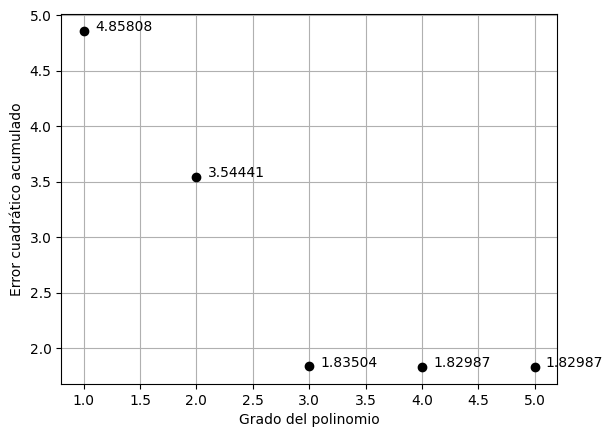

In [13]:
for i in range(len(sol)):
  plt.plot(i+1,sol[i].fun,'ok')
  plt.text(i+1.1,sol[i].fun,round(sol[i].fun,5))
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático acumulado')
plt.grid()

In [14]:
#Para conocer los coeficientes de los polinomios:
for i in range(len(sol)):
  print('Grado '+str(i+1)+':',sol[i].x)

Grado 1: [-0.01618773  0.65974854]
Grado 2: [ 0.10486623  0.70428371 -0.11223953]
Grado 3: [ 0.01729162  0.96455155  0.00522495 -0.14142492]
Grado 4: [ 0.02392874  0.97530026 -0.01625689 -0.14997379  0.00853266]
Grado 5: [ 2.39822755e-02  9.75129716e-01 -1.64533983e-02 -1.49714248e-01
  8.62931338e-03 -8.18728937e-05]


Notamos que para los polinomios de grado 4 y 5, los coeficientes más significativos (los multiplicados por $x^4$ y $x^5$), tienden a cero comparados con el resto de coeficientes, lo que sugiere un _sobreajuste_.

Un modelo con _sobreajuste_ puede dar buenos resultados en la interpolación pero malos en la extrapolación, lo que significa que las predicciones no van a ser correctas. Una maneta de evitar el sobreajuste es forzar el criterio de optimización a que los coeficientes sean equilibrados

Forzar a que la respuesta obtenida se ajuste a coeficientes equilibrados se llama regularización.

## Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto.

### Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [15]:
def ridge(beta,x,y,lam):
  f=fhat(beta,x)
  return np.sum((y-f)**2)+lam*np.sum(beta**2)

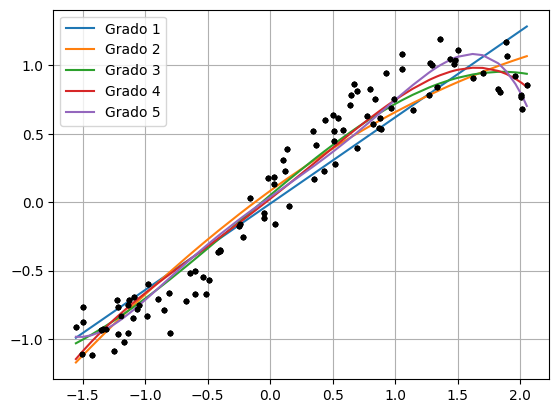

In [23]:
n=5
sol=[]
for i in range(1,n+1):
  beta_inicial=np.random.rand(i+1)
  sol.append(opt.minimize(ridge,beta_inicial,args=(x,y,5))) #pongo 1000 para darle más importancia a que los valores estén más equilibrados al ajuste que busco
  #puedo usar esta función cuando sepa que los modelos de ajuste para mis datos tengan sobreajuste.
  f=fhat(sol[-1].x,x)
  plt.plot(x,f,label='Grado '+str(i))
  plt.legend()
  plt.plot(x,y,'ok',ms=3)
  plt.grid()

In [24]:
#Coeficientes encontrados:
for i in range(len(sol)):
  print('Grado '+str(i+1)+':',sol[i].x)

Grado 1: [-0.01104002  0.63139466]
Grado 2: [ 0.08250052  0.66657838 -0.09093122]
Grado 3: [ 0.05047737  0.77090423 -0.04390432 -0.05893834]
Grado 4: [ 0.0240867   0.72310992  0.06111477 -0.01633697 -0.04409645]
Grado 5: [ 0.03737151  0.64484598 -0.0389261   0.14322624  0.01760997 -0.05616646]


### Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

# Clasificación binaria

Lo que veremos en esta clase son aspectos básicos de lo que se conoce técnicamente con muchos nombres sofisticados: aprendizaje de máquina (machine learning), clasificación con redes neuronales (neural networks), entre otros.

**Referencia**
- https://es.coursera.org/learn/neural-networks-deep-learning
___

## Formulación del problema

###  Idea básica

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="150px" />

Presentamos la idea básica de clasificación binaria mediante un ejemplo.

Tenemos como *entrada* una imagen digital y como *salida* una etiqueta que identifica a esta imagen como el logo del ITESO (en cuyo caso la etiqueta toma el valor de uno '1') o no (en cuyo caso la etiqueta toma el valor de cero '0').

A la salida la denotaremos $y$.

**¿Cómo guarda las imágenes un computador?** Código de colores RGB.

<font color = red>
$$R=\left[\begin{array}{cccc}255 & 124 & \dots & 45\\ 235 & 224 & \dots & 135\\ \vdots & \vdots & & \vdots\\ 23 & 12 & \dots & 242\end{array}\right]$$
</font>
<font color = green>
$$G=\left[\begin{array}{cccc}255 & 154 & \dots & 42\\ 215 & 24 & \dots & 145\\ \vdots & \vdots & & \vdots\\ 0 & 112 & \dots & 232\end{array}\right]$$
</font>
<font color = blue>
$$B=\left[\begin{array}{cccc}255 & 231 & \dots & 145\\ 144 & 234 & \dots & 35\\ \vdots & \vdots & & \vdots\\ 5 & 52 & \dots & 42\end{array}\right]$$
</font>

Cada matriz tiene tamaño correspondiente con los pixeles de la imagen. Si la imagen se de $64px\times 64px$, cada matriz será de $64\times 64$.

**¿Cómo podemos convertir entonces una imagen en una entrada?** Ponemos cada valor de cada matriz en un vector de características $\boldsymbol{x}$:

$$\boldsymbol{x}=\left[\begin{array}{ccc} \text{vec}R & \text{vec}G & \text{vec}B \end{array}\right]^T=\left[\begin{array}{ccccccccc} 255 & 124 & \dots & 255 & 154 & \dots & 255 & 231 & \dots \end{array}\right]^T$$

Entonces el problema de clasificación se puede resumir como dado un vector de entrada $\boldsymbol{x}$ (en este caso un vector con las intensidades de rojo, verde y azul por pixel de una imagen), predecir si la etiqueta correspondiente $y$ toma el valor de $1$ o $0$ (si es logo del ITESO o no).

### Notación
En adelante seguiremos la siguiente notación.

Un ejemplo de entrenamiento se representa por la pareja ordenada $(\boldsymbol{x},y)$, donde $\boldsymbol{x}\in\mathbb{R}^n$ y $y\in\left\lbrace0,1\right\rbrace$.

Tendremos $m$ ejemplos de entrenamiento, de modo que nuestro conjunto de entrenamiento será $\left\lbrace(\boldsymbol{x}^1,y^1),(\boldsymbol{x}^2,y^2),\dots,(\boldsymbol{x}^m,y^m)\right\rbrace$.

Por otra parte, para presentar de forma más compacta las entradas de entrenamiento, definimos la matriz

$$\boldsymbol{X}=\left[\begin{array}{c} {\boldsymbol{x}^1}^T \\ {\boldsymbol{x}^2}^T \\ \vdots \\ {\boldsymbol{x}^m}^T \end{array}\right]\in\mathbb{R}^{m\times n},$$

cuyas filas son los vectores de entrenamiento de entrada transpuestos, y el vector

$$\boldsymbol{Y}=\left[\begin{array}{c} y^1 \\ y^2 \\ \vdots \\ y^m \end{array}\right]\in\mathbb{R}^{m},$$

cuyas componentes son las etiquetas (salidas) de entrenamiento.

## Regresión logística

La idea entonces es, dado un vector de características $\boldsymbol{x}$ (quizá correspondiente a una imagen que queramos identificar como el logo del ITESO o no), queremos obtener una predicción $\hat{y}$ que es nuestro estimado de $y$.

Formalmente $\hat{y}=P(y=1|\boldsymbol{x})\in\left[0,1\right]$...

Los parámetros de regresión serán $\boldsymbol{\beta}=\left[\beta_0\quad \beta_1\quad \dots\quad \beta_n \right]^T\in\mathbb{R}^{n+1}.$

**Primera idea:** usar una regresor lineal

$$\hat{y}=\beta_0+\beta_1x_1+\beta_2x_2+\dots+\beta_nx_n=\left[1\quad \boldsymbol{x}^T\right]\boldsymbol{\beta}=\boldsymbol{x}_a^T\boldsymbol{\beta},$$

donde $\boldsymbol{x}_a=\left[1\quad \boldsymbol{x}^T \right]^T\in\mathbb{R}^{n+1}$.

¿Cuál es el problema? Que el producto punto $\boldsymbol{\beta}^T\boldsymbol{x}_a$ no está entre $0$ y $1$.

**Entonces,** pasamos el regresor lineal por una sigmoide (función logística)

$$\sigma(z)=\frac{1}{1+e^{-z}}$$

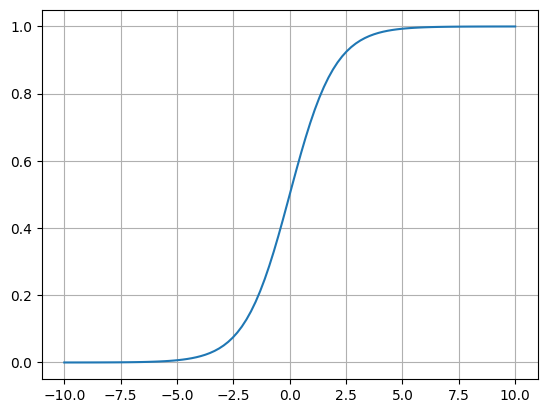

In [27]:
#sigmoidal
#
z=np.linspace(-10,10,100)
def sigmoidal(z):
  return 1/(1+np.exp(-z))
plt.plot(z,sigmoidal(z))
plt.grid()

Notamos que:
- Si $z$ es grande, $\sigma(z)=1$.
- Si $-z$ es grande, $\sigma(z)=0$.
- $\sigma(0)=0.5$.

Finalmente...

**Regresor logístico:** $\hat{y}=\sigma(\boldsymbol{x}_a^T\boldsymbol{\beta})$.

Para manejar todos los datos de entrenamiento, se define la matriz

$$\boldsymbol{X}_a=\left[\boldsymbol{1}_{m\times 1}\quad \boldsymbol{X}\right]=\left[\begin{array}{cc} 1 & {\boldsymbol{x}^1}^T \\ 1 & {\boldsymbol{x}^2}^T \\ \vdots & \vdots \\ 1 & {\boldsymbol{x}^m}^T \end{array}\right]\in\mathbb{R}^{m\times (n+1)}.$$

Así,

$$\hat{\boldsymbol{Y}}=\left[\begin{array}{c} \hat{y}^1 \\ \hat{y}^2 \\ \vdots \\ \hat{y}^m \end{array}\right]=\sigma(\boldsymbol{X}_a\boldsymbol{\beta})$$

In [28]:
#Regresión logística
def regresion_logistica(beta,X):
  Xa=np.hstack((np.ones((X.shape[0],1)),X)) #hstack es una concatenación en el eje 1 horizontal
  return sigmoidal(Xa@beta) #el @ es multiplicación matricial

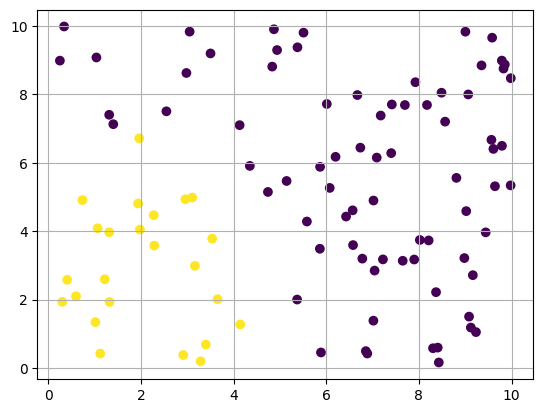

In [34]:
X=np.random.uniform(0,10,(100,2)) #Variable independiente de dimensión 2
Y=X[:,1]<5-0.5*X[:,0]**2+2*X[:,0]
Y=Y.astype('int') #convertimos los valores booleanos a enteros para usarlos más adelante

plt.scatter(X[:,0],X[:,1],c=Y)
plt.grid()

Tratamos de encontrar una función que separe los puntos amarillos de los morados.

## Funcional de costo
Ya que tenemos definida la forma de nuestro modelo clasificador, debemos **entrenar** los parámetros $\boldsymbol{\beta}$ con los ejemplos de entrenamiento.

Es decir, dados  $\left\lbrace(\boldsymbol{x}^1,y^1),(\boldsymbol{x}^2,y^2),\dots,(\boldsymbol{x}^m,y^m)\right\rbrace$, queremos encontrar parámetros $\boldsymbol{\beta}$ tales que $\hat{y}^i=\sigma({\boldsymbol{x}_a^i}^T\boldsymbol{\beta})\approx y^i$ 'lo mejor posible'.

Esto lo plantearemos como un problema de optimización.

**Primera idea:** minimizar error cuadrático $\min_{\boldsymbol{\beta}} \frac{1}{m}\sum_{i=1}^m (\hat{y}^i-y^i)^2$. Problema de optimización *no convexo*.

**Alternativa:** entonces, se buscó una función de modo que el problema de optimización fuera convexo. Esta es:

$$\min_{\boldsymbol{\beta}} \frac{1}{m}\sum_{i=1}^m -\left(y^i\log(\hat{y}^i)+(1-y^i)\log(1-\hat{y}^i)\right)$$

No pretendemos explicar toda esta función. Pero sí podemos ganar algo de intuición de porqué la usamos. Fijemos un $i$ dentro del sumatorio y consideremos el término $-\left(y^i\log(\hat{y}^i)+(1-y^i)\log(1-\hat{y}^i)\right)$.

- Si $y^i=1$, entonces lo que queremos minimzar es $-\log(\hat{y}^i)$. Es decir, queremos que $\hat{y}^i=\sigma({\boldsymbol{x}_a^i}^T\boldsymbol{\beta})$ sea lo más grande posible, osea $1=y^i$.
- Si $y^i=0$, entonces lo que queremos minimzar es $-\log(1-\hat{y}^i)$. Es decir, queremos que $\hat{y}^i=\sigma({\boldsymbol{x}_a^i}^T\boldsymbol{\beta})$ sea lo más pequeño posible, osea $0=y^i$.

En cualquier caso, esta función objetivo cumple con lo requerido.



**Planteo el problema**

$$\sigma(z)=\frac{1}{1+e^{-z}}$$ es mi ecuación base


In [35]:
#Criterio de optimización convexo

def costo(beta,X,Y):
  Yhat=regresion_logistica(beta,X) #modelo que buscamos
  return np.mean(-Y*np.log(Yhat)*np.log(1-Yhat))

In [36]:
sol=opt.minimize(costo,np.random.rand(3),args=(X,Y))
sol

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.11530872288225102
        x: [-4.032e-04  1.305e-04  3.913e-05]
      nit: 17
      jac: [-6.380e-07  4.588e-06  1.543e-06]
 hess_inv: [[ 1.706e+02 -3.382e+01 -2.552e+01]
            [-3.382e+01  1.672e+01 -5.310e-02]
            [-2.552e+01 -5.310e-02  8.690e+00]]
     nfev: 92
     njev: 23

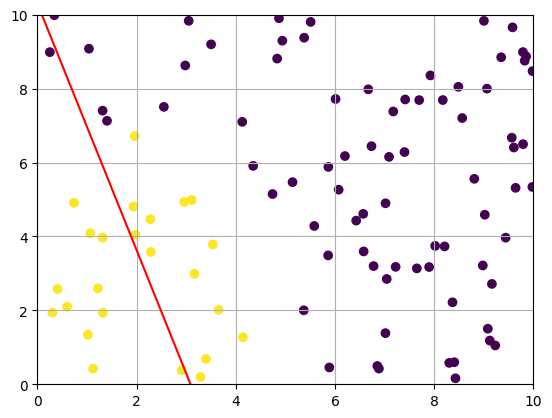

In [40]:
plt.scatter(X[:,0],X[:,1],c=Y)
x=np.linspace(0,10,100)
separacion=(-sol.x[0]-sol.x[1]*x)/sol.x[2] #separación entre los puntos de pertenencia
plt.plot(x,separacion,'r')
plt.xlim(0,10)
plt.ylim(0,10)
plt.grid()